In [31]:
from apportionment import Apportionment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import find_peaks

In [4]:
# Simulation parameters
voters = 1000000
num_seats = 150
nit = 100
group_size = 10000
link='NRSR2023_clean.csv'
file='test2811_11.csv'

ap = Apportionment(num_seats, voters, link=link) 
# -> TODO higher tresholds for coalitions
print("No of votes from source:", sum(ap.subject_votes.values()))
print("Considered votes:", ap.voters)
print("No. of seats:", num_seats)
weights = ap.subject_votes
# print(weights)

#apportionment test
result = ap.divide_seats("slovak")
if not (sum(result.values()) == 150): print(result.values()) 
else: print("seats ok")
if not (list(result.values()) == [32, 16, 11, 10, 42, 27, 12]): print(result.values()) 
else: print("apport ok")
print("Apportionment should work correctly.")

print("sum of probs:", sum(ap.probabilities.values()))
if not os.path.exists(file):
    ap.iterated_simulate('boxes', file, nit=nit, group_size=group_size)
else:
    print("Simulation did not happen, file already exists!")

link NRSR2023_clean.csv
No of votes from source: 4388872
Considered votes: 1000000
No. of seats: 150
seats ok
apport ok
Apportionment should work correctly.
sum of probs: 0.9999999999999998
Simulation did not happen, file already exists!


In [5]:
df = pd.read_csv('test2811_6.csv')
df['weight'] = df['party_number'].map(weights)

grouped_df = df.groupby('samples').mean().reset_index()
weighted_df = df.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')


x_valuesg = grouped_df['samples']
y_valuesg = grouped_df['diff']


x_valuesw = weighted_df['samples']
y_valuesw = weighted_df['diff']


df = pd.read_csv('test2811_12.csv')
df['weight'] = df['party_number'].map(weights)

grouped_df = df.groupby('samples').mean().reset_index()
weighted_df = df.groupby('samples').apply(lambda x: np.average(x['diff'], weights=x['weight'])).reset_index(name='diff')



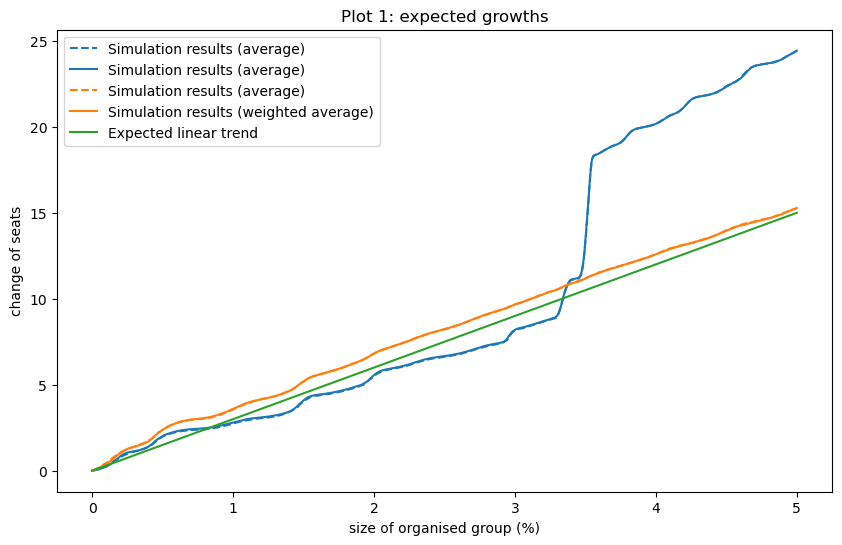

In [54]:

plt.figure(figsize=(10, 6))

x_vals_gr = grouped_df['samples']
y_vals_gr = grouped_df['diff']

plt.plot(x_valuesg / 1000, y_valuesg, '--', markersize=1, label='Simulation results (average)', color='#1f77b4')
plt.plot(x_vals_gr / 1000, y_vals_gr, '-', markersize=1, label='Simulation results (average)', color='#1f77b4')

x_vals_we = weighted_df['samples']
y_vals_we = weighted_df['diff']

plt.plot(x_valuesw / 1000, y_valuesw, '--', markersize=1, label='Simulation results (average)', color='#ff7f0e')
plt.plot(x_vals_we / 1000, y_vals_we, '-', markersize=1, label='Simulation results (weighted average)', color='#ff7f0e')

x = np.arange(1, 5001)
y = (3/1000) * x

plt.plot(x / 1000, y, label='Expected linear trend', color='#2ca02c')
plt.xlabel('size of organised group (%)')
plt.ylabel('change of seats')
plt.title('Plot 1: expected growths')

plt.legend()
plt.show()

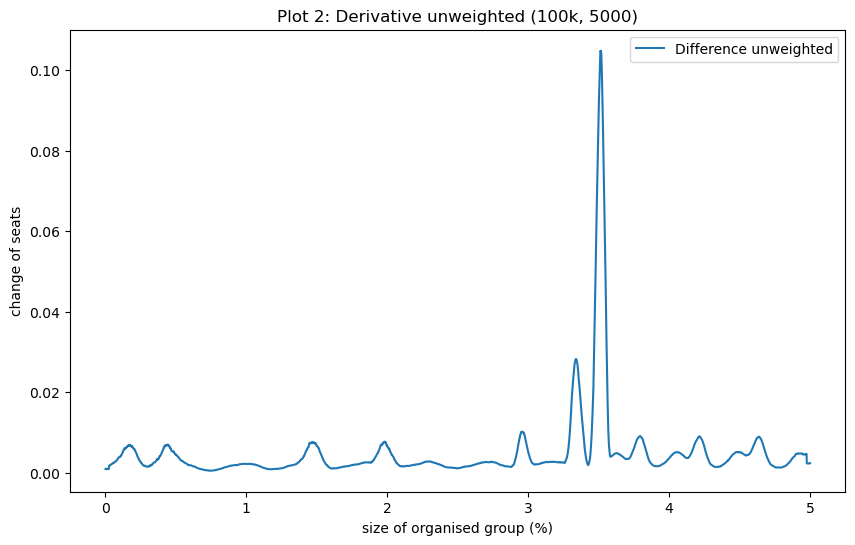

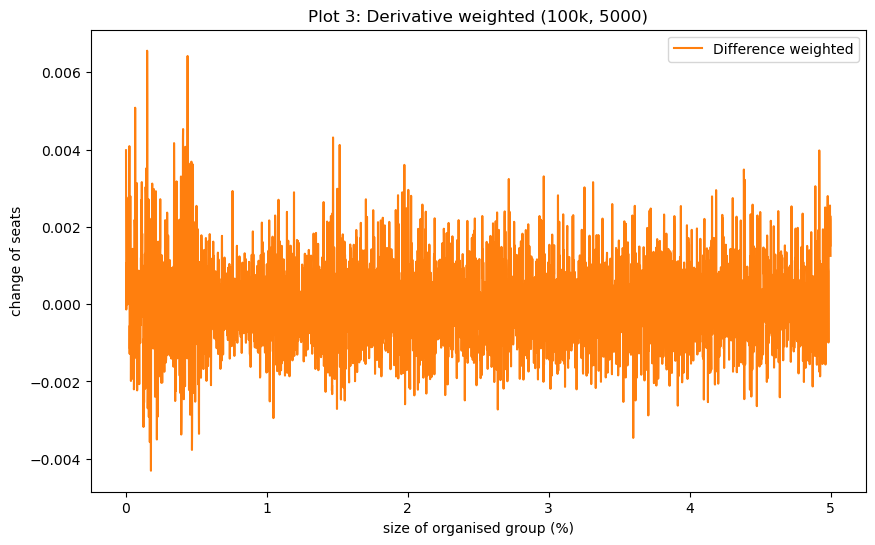

In [77]:
window = 5

## UNWEIGHTED

plt.figure(figsize=(10, 6))

y_diff_gr = np.gradient(y_vals_gr.rolling(window=window, center=True, min_periods=1).mean())

y_diff_gr = np.gradient(y_vals_gr)
y_diff_gr_rolling = np.gradient(y_vals_gr.rolling(window=window, center=True, min_periods=1).mean()) # try to plot thisinstead of y_final

grouped_df['y_rel_diff'] = (y_diff_gr - y_diff_gr_rolling)

y_final_gr = grouped_df['y_rel_diff'].rolling(window=1, center=True, min_periods=1).mean()

plt.plot(x_vals_gr / 1000, y_diff_gr_rolling, '-', markersize=1, label='Difference unweighted')

plt.xlabel('size of organised group (%)')
plt.ylabel('change of seats')
plt.title('Plot 2: Derivative unweighted (100k, 5000)')

plt.legend()
plt.show()


## WEIGHTED

plt.figure(figsize=(10, 6))

y_diff_we = np.gradient(y_vals_we)
y_diff_we_rolling = np.gradient(y_vals_we.rolling(window=window, center=True, min_periods=1).mean()) # try to plot thisinstead of y_final

weighted_df['y_rel_diff'] = (y_diff_we - y_diff_we_rolling)

y_final_we = weighted_df['y_rel_diff'].rolling(window=1, center=True, min_periods=1).mean()

plt.plot(x_vals_we / 1000, y_final_we, '-', markersize=1, label='Difference weighted', color='#ff7f0e')

plt.xlabel('size of organised group (%)')
plt.ylabel('change of seats')
plt.title('Plot 3: Derivative weighted (100k, 5000)')

plt.legend()
plt.show()

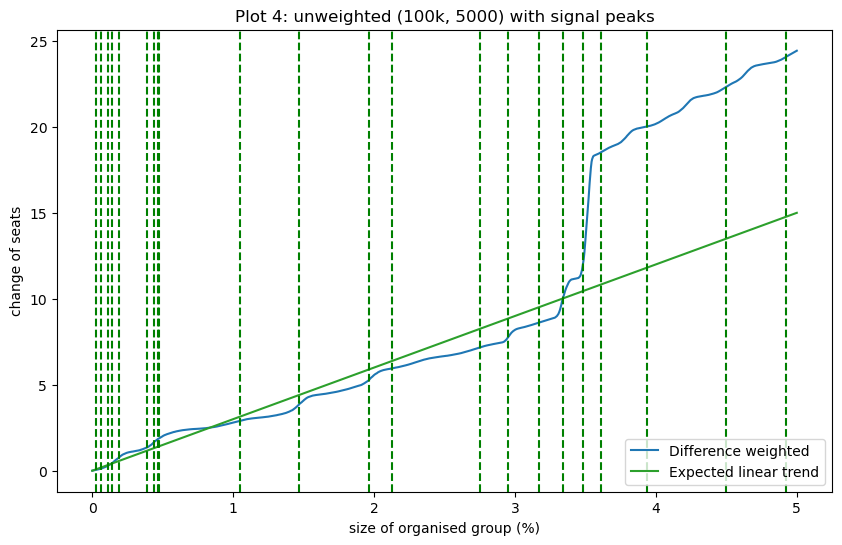

In [70]:
plt.figure(figsize=(10, 6))

plt.plot(x_vals_gr / 1000, y_vals_gr, '-', markersize=1, label='Difference weighted')

x = np.arange(1, 5001)
y = (3/1000) * x

plt.plot(x / 1000, y, label='Expected linear trend', color='#2ca02c')

signal_data = y_diff_we_rolling

peaks, _ = find_peaks(signal_data, height=-0.001, prominence=0.0025)

peak_distances = np.diff(peaks)

for x in peaks:
    plt.axvline(x=x/1000, color='g', linestyle='--')


plt.xlabel('size of organised group (%)')
plt.ylabel('change of seats')
plt.title('Plot 4: unweighted (100k, 5000) with signal peaks')

plt.legend()
plt.show()

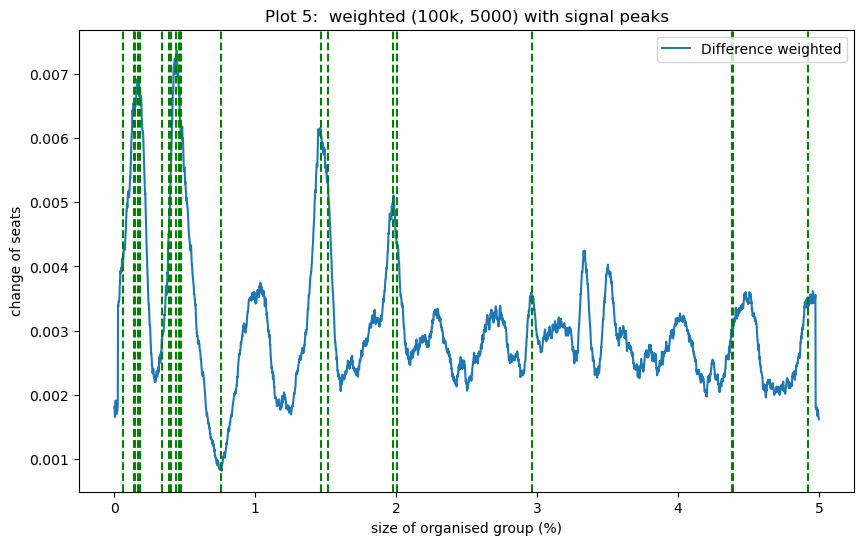

In [78]:
plt.figure(figsize=(10, 6))

plt.plot(x_vals_we / 1000, y_diff_we_rolling, '-', markersize=1, label='Difference weighted')

x = np.arange(1, 5001)
y = (3/1000) * x

# plt.plot(x / 1000, y, label='Expected linear trend', color='#2ca02c')

signal_data = y_final_we

peaks, _ = find_peaks(signal_data, prominence=0.0055)

peak_distances = np.diff(peaks)

for x in peaks:
    plt.axvline(x=x/1000, color='g', linestyle='--')


plt.xlabel('size of organised group (%)')
plt.ylabel('change of seats')
plt.title('Plot 5:  weighted (100k, 5000) with signal peaks')

plt.legend()
plt.show()